In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  ' + str(test_X.shape))
print('Y_test:  ' + str(test_y.shape))

X = np.concatenate((train_X,test_X))
Y = np.concatenate((train_y,test_y))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


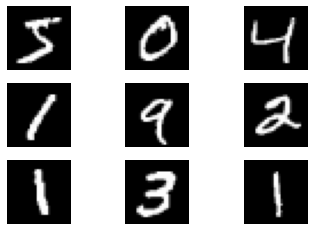

In [4]:
a = 3; b = 3
fig, axs = plt.subplots(a, b)
k = 0
for i in range (a):
    for j in range (b):
        axs[i, j].imshow(X[k], cmap=plt.get_cmap('gray'))
        k+=1
for ax in axs.flat:
    ax.axis('off')
    
plt.show()

In [5]:
Y[0]

5

https://habr.com/ru/post/466565/
https://dev-gang.ru/article/kak-sgenerirovat-sluczainuu-stroku-v-python-wwnl77lvl4/
https://habr.com/ru/post/505616/

In [6]:
import secrets
import string


def generate_alphanum_crypt_string(length):
#     letters_and_digits = string.ascii_letters + string.digits
#    crypt_rand_string = ''.join(secrets.choice(letters_and_digits) for i in range(length))
    crypt_rand_string = np.random.randint(0, 10, length)
    return crypt_rand_string

In [7]:
generate_alphanum_crypt_string(100)

array([4, 7, 6, 2, 9, 2, 1, 3, 5, 6, 9, 0, 2, 6, 9, 9, 9, 6, 1, 9, 2, 4,
       4, 3, 8, 4, 2, 1, 1, 5, 0, 0, 5, 6, 4, 3, 6, 5, 6, 7, 5, 6, 3, 6,
       9, 6, 8, 6, 2, 2, 6, 7, 1, 4, 7, 3, 6, 2, 8, 6, 9, 3, 1, 9, 3, 9,
       2, 4, 6, 6, 4, 3, 3, 1, 3, 3, 9, 2, 3, 0, 4, 5, 5, 9, 4, 6, 1, 8,
       1, 9, 0, 9, 1, 5, 2, 8, 3, 8, 1, 4])

In [8]:
def generate_texts (L):
    l = 30
    a = np.array(generate_alphanum_crypt_string(l))
    for i in range(1,L):
        a = np.vstack((a,generate_alphanum_crypt_string(l)))
    return a

In [9]:
generated_texts = generate_texts (110)
print(generated_texts.shape)

(110, 30)


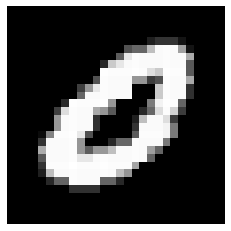

In [10]:
def get_index(a):
    return np.random.choice(np.where(Y == np.uint8(a))[0], 1, replace=False)[0] 

plt.imshow(X[get_index(0)], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [11]:
def concarnate_symbols (a,b):
    mas_a = np.copy(a); mas_b = np.copy(b)
    return np.concatenate((mas_a,mas_b),axis = 1)

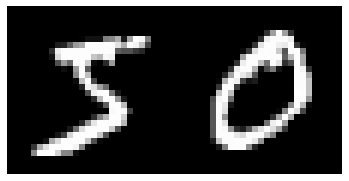

In [12]:
plt.imshow(concarnate_symbols (X[0],X[1]), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [13]:
def image_string (L):
    mas = np.array(X[get_index([L[0]])])
    for i in range(1,len(L)):
        mas = concarnate_symbols (mas,X[get_index([L[i]])])
    return mas       

In [14]:
def show_image_text(image_string,generated_texts,k = 4):
    print ('Array parameters for one row')
    print(image_string (generated_texts[0]).shape)
    print (f'We have {len(generated_texts)} rows \n')
    print(generated_texts[0])
    plt.imshow(image_string (generated_texts[0]), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    mas = np.array([image_string (generated_texts[0])])
    for i in range (1,len(generated_texts)):
        if i <= k-1: 
            print(generated_texts[i])
            plt.imshow(image_string(generated_texts[i]), cmap=plt.get_cmap('gray'))
            plt.axis('off')
            plt.show()
        mas = np.vstack((mas,[image_string (generated_texts[i])]))
    return mas
            
    
        
        

Якщо зменшити кількість сиволів у рядку, то зображення буде краще виводитися.

In [15]:
image_text = show_image_text(image_string,generated_texts,4)

Array parameters for one row
(28, 840)
We have 110 rows 

[3 1 3 6 3 0 0 6 7 8 1 9 3 5 9 9 1 7 7 2 3 2 2 7 7 8 3 6 5 6]


[9 7 1 4 1 4 0 4 2 6 7 1 9 0 0 6 2 5 0 9 0 0 2 8 1 1 8 4 6 7]


[8 9 7 2 7 3 3 8 9 5 2 9 2 1 0 5 7 0 2 4 8 4 4 2 0 2 0 7 9 1]


[2 8 0 9 0 2 9 7 9 4 1 1 2 9 6 6 2 4 9 2 3 9 2 8 2 4 5 3 6 1]


https://overcoder.net/q/419744/%D0%BA%D0%B0%D0%BA-%D0%B4%D0%BE%D0%B1%D0%B0%D0%B2%D0%B8%D1%82%D1%8C-%D1%88%D1%83%D0%BC-gaussian-%D1%81%D0%BE%D0%BB%D1%8C-%D0%B8-%D0%BF%D0%B5%D1%80%D0%B5%D1%86-%D0%B8-%D1%82-%D0%B4-%D0%B4%D0%BB%D1%8F-%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F-%D0%B2-python-%D1%81-opencv

In [16]:
import cv2
im = np.zeros(image_string (generated_texts[0]).shape, np.uint8)
im = cv2.randn(im,(0),(99))

In [17]:
import random
def gasuss_noise(image, mean=0, var=0.001):

    '''
        Добавить гауссовский шум
                 Среднее значение: среднее
                 Вар: Разнообразие
    '''
    
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)

    return out

https://russianblogs.com/article/63961912329/

In [18]:
def create_noise_on_image (M):
    mas = np.array([gasuss_noise(np.copy(M[0]), mean=0, var=0.01)])
    plt.imshow(mas[0], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    for i in range(1,len(M)):
        mas = np.vstack((mas,[gasuss_noise(np.copy(M[i]), mean=0, var=0.01)]))
        if i < 10:
            plt.imshow(mas[i], cmap=plt.get_cmap('gray'))
            plt.axis('off')
            plt.show()
    return mas
    

In [19]:
print(image_text[0],image_text[0].shape )
# 10 words 28x28

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (28, 840)


In [20]:
noise_on_image = create_noise_on_image (image_text)

In [21]:
plt.imshow(image_text[0], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

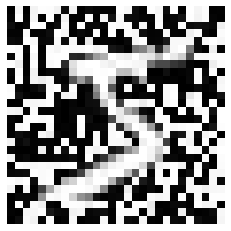

In [22]:
plt.imshow(gasuss_noise(X[0], mean=0, var=0.001), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [23]:
def char_i_j (image_text,i,j):
    a = np.copy(image_text[i][0:28])#[0:28] j*28:(j+1)*28
    a = a[0:28,j*28:(j+1)*28]
#     plt.imshow(a, cmap=plt.get_cmap('gray'))
#     plt.axis('off')
#     plt.show()
    return a

In [24]:
def create_x (text_image,i,j):
    mas = np.copy(char_i_j (text_image,i,j).reshape((1,28*28)))
    return mas

In [25]:
def string_of_x(text_image,i):
    mas = np.array([create_x (text_image,i,0)])
    for j in range(1,int(len(text_image[0][0])/28)):
        mas = np.vstack((mas,[create_x (text_image,i,j)]))
    return mas
                   

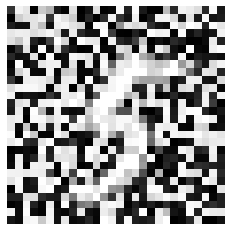

In [26]:
string_of_x(noise_on_image,4).shape
plt.imshow(string_of_x(noise_on_image,4)[0][0].reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()


In [27]:
def text_of_x (text_image):
    mas = np.array([string_of_x(text_image,0)])
    for i in range(1,len(text_image)):
        mas = np.vstack((mas,[string_of_x(text_image,i)]))
    return mas

In [28]:
my_text_of_x = text_of_x (noise_on_image[:10])
my_text_of_x.shape

(10, 30, 1, 784)

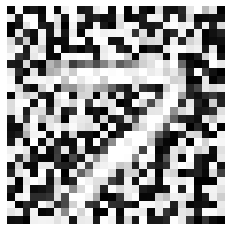

7

In [29]:
a = 5; b = 10
plt.imshow(char_i_j (noise_on_image,a,b), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
generated_texts[a][b]

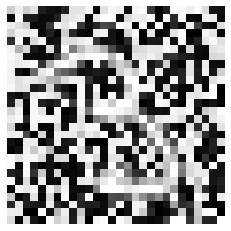

In [30]:
plt.imshow(my_text_of_x[0][0].reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [31]:
L = np.zeros((10,28*28))

In [32]:
def special_text_for_L (my_text_of_x,generated_texts,k):
    text_for_L = np.zeros(my_text_of_x.shape)
    for i in range(len(my_text_of_x)):
        for j in range(len(my_text_of_x[0])):
            if k == generated_texts[i][j]: text_for_L[i][j] = my_text_of_x[i][j]
            else:text_for_L[i][j] = -1*my_text_of_x[i][j];
    return text_for_L
    

In [33]:
def perceptron(my_text_of_x,generated_texts,L):
    for k in range (len(L)):
        text_for_L = special_text_for_L (my_text_of_x,generated_texts,k)
        for i in range(len(my_text_of_x)):
            for j in range(len(my_text_of_x[0])):
                #if i == 0 and j == 0: print(L[k],text_for_L[i][j])
                if np.dot(L[k],text_for_L[i][j][0])<=0:  L[k]+=text_for_L[i][j][0]; return perceptron(my_text_of_x,generated_texts,L);
    return L

In [34]:
L = perceptron(my_text_of_x,generated_texts,L)

In [35]:
my_text_of_x = text_of_x (noise_on_image[10:])
my_text_of_x.shape

(100, 30, 1, 784)

In [85]:
def matrix_A_for_char (char):
    A = np.zeros(10)
    for i in range(10):
        A[i] = np.dot(L[i],char[0])
    a = np.argmax(A)
    return int(a)

In [86]:
a = matrix_A_for_char (my_text_of_x[0][0])
a

5

In [75]:
def get_chars_for_images (im_text,text):
    mas = np.zeros(text.shape); a,b=text.shape
    for i in range(a):
        for j in range(b):
            mas[i][j]=matrix_A_for_char(im_text[i][j])
    return mas
            
            

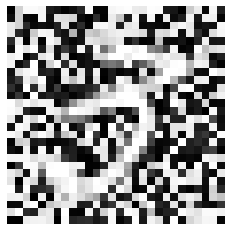

3


In [55]:
image_text_1 = image_text[10:]
generated_texts_1 = generated_texts[10:]
noise_on_image_1 = noise_on_image[10:]
#char_i_j (image_text_1,0,0)
plt.imshow(my_text_of_x[0][0].reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
print(generated_texts_1[0][0])

In [94]:
a,b = generated_texts_1.shape
print(generated_texts_1.shape)
m = get_chars_for_images (my_text_of_x,generated_texts_1)
c = (m==generated_texts_1).sum()
print('Right answers',c)
print("=> Accuracy:", c/(a*b))
print ("REAL")
print(generated_texts_1)
print ("OUR RESULTS")
print(m)

(100, 30)
Right answers 962
=> Accuracy: 0.32066666666666666
REAL
[[3 4 1 ... 0 4 8]
 [2 5 0 ... 1 0 4]
 [1 1 9 ... 5 3 8]
 ...
 [9 7 5 ... 6 0 0]
 [3 2 1 ... 8 4 2]
 [7 2 2 ... 3 9 7]]
OUR RESULTS
[[5. 9. 8. ... 0. 4. 9.]
 [2. 9. 8. ... 1. 0. 9.]
 [1. 1. 1. ... 8. 8. 9.]
 ...
 [9. 4. 9. ... 9. 0. 5.]
 [9. 1. 1. ... 5. 9. 5.]
 [5. 9. 2. ... 2. 8. 8.]]
